In [2]:
import pandas as pd
import numpy as np
import os

In [9]:
main_path = '/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/vine_old'
tidy_data_path = os.path.join(main_path,"data","tidy","vineland_210722")
raw_data_path = os.path.join(main_path,"data","raw")
results_path = os.path.join(main_path,"results")
plot_path = os.path.join(main_path,"plot")

In [8]:
#load subject list
file = 'Sublist_VABS_ASD_older_than72_1timepoint_220722.csv'
df = pd.read_csv(os.path.join(tidy_data_path,file),
                        header=0,
                        #skiprows=[1],
                        low_memory=False)

df.drop('Unnamed: 0', 1, inplace = True)
df.columns = ['sub_ID']
df['VABS_old'] = "YES"
df.head(10)

,sub_ID,VABS_old
0,NDARUR864GDR,YES
1,NDARUZ978TZ7,YES
2,NDARDA487RHJ,YES
3,NDARJW531AVE,YES
4,NDARPM369WUN,YES
5,NDARTY036ZYN,YES
6,NDAR_INVBJ227AT5,YES
7,NDARRT204AMB,YES
8,NDARZP238NRM,YES
9,NDARPG262WWQ,YES


# EARLY MULLEN

In [17]:
# mullen
file = 'mullen03.txt'
df_mullen = pd.read_table(os.path.join(raw_data_path,'mullen_070722',file))
df_mullen.drop(labels=0, axis=0,inplace=True)
df_mullen.head()

/Users/vmandelli/opt/anaconda3/envs/vine_proj/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0,1,2,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,

,collection_id,mullen03_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,interview_chrono_age,interview_adj_age,sex,...,visday,msel_basal,msel_ceiling,set1_flower,v_dq,nv_dq,visnum,average_mullen,version_form,collection_title
1,1856,17353,7881,NDARJU572VUW,2035,05/17/2007,35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Early Language Development within the Autism S...
2,1856,17423,7881,NDARHB255UYG,2056,09/17/2007,35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Early Language Development within the Autism S...
3,1856,17458,7881,NDARVX866UXT,3008,02/04/2008,25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Early Language Development within the Autism S...
4,1856,17475,7881,NDAREJ342TWT,2085,02/24/2009,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Early Language Development within the Autism S...
5,1856,17489,7881,NDARRX381TTG,2081,02/16/2009,48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Early Language Development within the Autism S...


In [18]:
subject_list_mullen = df_mullen[['subjectkey']].drop_duplicates()
print(subject_list_mullen.shape)
subject_list_mullen.columns = ['sub_ID']
subject_list_mullen['mels'] = "YES"
subject_list_mullen.head()

(10102, 1)


,sub_ID,mels
1,NDARJU572VUW,YES
2,NDARHB255UYG,YES
3,NDARVX866UXT,YES
4,NDAREJ342TWT,YES
5,NDARRX381TTG,YES


In [25]:
# merge the subject lists (as dataframe)
df_merged = pd.merge(df, subject_list_mullen, on="sub_ID",how="left")
df_merged

,sub_ID,VABS_old,mels
0,NDARUR864GDR,YES,NaN
1,NDARUZ978TZ7,YES,NaN
2,NDARDA487RHJ,YES,NaN
3,NDARJW531AVE,YES,NaN
4,NDARPM369WUN,YES,NaN
...,...,...,...
2559,NDAR_INVMW566UNN,YES,NaN
2560,NDAR_INVDE318ECL,YES,NaN
2561,NDAR_INVKR821KDV,YES,NaN
2562,NDARHB805DWE,YES,NaN


In [28]:
# create a columns that merges the presence of both MSEL and VABS old
df_merged['VABS_old_mels']= df_merged.VABS_old+df_merged.mels
df_merged

# if the column VABS_old_mels == YESYES it means that there are both VABS and MELS
df_merged_ = df_merged[df_merged.VABS_old_mels=="YESYES"]
print(df_merged_.shape)

# extract subjecti ids of those that have both VABS and MELS
sub_id_vabs_old_mels= df_merged_.sub_ID

(261, 4)


In [29]:
# select only those sub ids (that have both MSEL and VABS old)
df_mullen_vabs_old = df_mullen[df_mullen['subjectkey'].isin(sub_id_vabs_old_mels)]
print(df_mullen_vabs_old.shape)
df_mullen_vabs_old


(828, 563)


,collection_id,mullen03_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,interview_chrono_age,interview_adj_age,sex,...,visday,msel_basal,msel_ceiling,set1_flower,v_dq,nv_dq,visnum,average_mullen,version_form,collection_title
300,1358,23,7988,NDARDE148UZK,108846-100,01/07/2010,28,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biological Signatures of Autism
312,1358,60,7988,NDARBD516EK3,109232-100,06/21/2010,35,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biological Signatures of Autism
316,1358,13,7988,NDARCB221KEA,108693-100,03/31/2010,38,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biological Signatures of Autism
319,1358,2,7988,NDARRF272YMG,107965-100,10/21/2009,38,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biological Signatures of Autism
329,1358,71,7988,NDARCX265ARU,109441-200,08/26/2010,37,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biological Signatures of Autism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26350,2192,29339,9777,NDARTM338TA5,IGF013,11/06/2014,73,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piloting Treatment with Insulin-Like Growth Fa...
26351,2192,29342,9777,NDARBW444BMA,IGF017,06/25/2015,62,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piloting Treatment with Insulin-Like Growth Fa...
26352,2192,29341,9777,NDARTK553HJX,IGF016,05/21/2015,76,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piloting Treatment with Insulin-Like Growth Fa...
26353,2192,29338,9777,NDARPD835ZYX,IGF012,09/03/2014,92,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piloting Treatment with Insulin-Like Growth Fa...


In [30]:
#select only needed colums
cols= ['subjectkey',
       'interview_age','scoresumm_gm_t_score',
                    'scoresumm_vr_t_score',
                    'scoresumm_fm_t_score',
                    'scoresumm_rl_t_score',
                    'scoresumm_el_t_score',
                    'scoresumm_elc_std_score',
                    'scoresumm_gm_age_equiv',
                    'scoresumm_vr_age_equiv',
                    'scoresumm_fm_age_equiv',
                    'scoresumm_rl_age_equiv',
                    'scoresumm_el_age_equiv' ]

df_mullen_vabs_old=df_mullen_vabs_old[cols]
df_mullen_vabs_old

,subjectkey,interview_age,scoresumm_gm_t_score,scoresumm_vr_t_score,scoresumm_fm_t_score,scoresumm_rl_t_score,scoresumm_el_t_score,scoresumm_elc_std_score,scoresumm_gm_age_equiv,scoresumm_vr_age_equiv,scoresumm_fm_age_equiv,scoresumm_rl_age_equiv,scoresumm_el_age_equiv
300,NDARDE148UZK,28,-9,41,29,50,46,83,-9,24,21,28,26
312,NDARBD516EK3,35,-9,28,26,20,20,54,-9,25,26,15,14
316,NDARCB221KEA,38,-9,20,20,20,20,49,-9,24,22,10,15
319,NDARRF272YMG,38,-9,54,59,39,47,99,-9,40,42,31,36
329,NDARCX265ARU,37,-9,20,20,20,33,53,-9,24,26,13,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26350,NDARTM338TA5,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26351,NDARBW444BMA,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26352,NDARTK553HJX,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26353,NDARPD835ZYX,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-31-d70f89c7bdbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mullen_vabs_old['check_na']=df_mullen_vabs_old.isnull().sum(axis=1)


AxesSubplot(0.125,0.125;0.775x0.755)


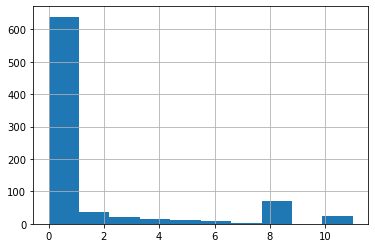

In [31]:
# check number of nans
df_mullen_vabs_old['check_na']=df_mullen_vabs_old.isnull().sum(axis=1)
print(df_mullen_vabs_old['check_na'].hist())

df_mullen_vabs_old_ = df_mullen_vabs_old[df_mullen_vabs_old['check_na']<5]

In [32]:
# print infos
print('total number of subject in the VABS_old:',df[['sub_ID']].drop_duplicates().shape[0])
print('number of mullen observation available:',df_mullen_vabs_old_.shape[0])
print('number of unique mullen subjects available:',df_mullen_vabs_old_[['subjectkey']].drop_duplicates().shape[0])

total number of subject in the VABS_old: 2564
number of mullen observation available: 713
number of unique mullen subjects available: 206


# EARLY VABS

In [33]:

vine_1_filename = 'vinelandparent_200503.txt'
vine_1_ = pd.read_table(os.path.join(raw_data_path,'vineland_210722',vine_1_filename), sep='\t',
                                        header=0,
                                        skiprows=[1],
                                        low_memory=False)
vine_1_['interview_age']=vine_1_['interview_age'].astype('int')
vine_1 = vine_1_[vine_1_['interview_age']<72]

vine_2_filename = 'vinelandsurvey_200505.txt'
vine_2_ = pd.read_table(os.path.join(raw_data_path,'vineland_210722',vine_2_filename), sep='\t',
                                        header=0,
                                        skiprows=[1],
                                        low_memory=False)
vine_2_['interview_age']=vine_2_['interview_age'].astype('int')
vine_2 = vine_2_[vine_2_['interview_age']<72]

vine_3_filename = 'vinland301.txt'
vine_3_ = pd.read_table(os.path.join(raw_data_path,'vineland_210722',vine_3_filename), sep='\t',
                                        header=0,
                                        skiprows=[1],
                                        low_memory=False)
vine_3_['interview_age']=vine_3_['interview_age'].astype('int')
vine_3 = vine_3_[vine_3_['interview_age']<72]

vine_3.rename(columns = {'dailylivsk_stnd_score':'livingskillsdomain_totalb'}, inplace=True)

#merge only sub_ids
vineland_col_names = ['subjectkey','interview_age',
                      'communicationdomain_totalb',
                      'livingskillsdomain_totalb',
                      'socializationdomain_totalb',
                      'motorskillsdomain_totalb', ### add here
                      'composite_totalb']
vine_young = vine_1[vineland_col_names].append(vine_2[vineland_col_names]).append(vine_3[vineland_col_names])
print(vine_young.shape)

(17493, 7)


/Users/vmandelli/opt/anaconda3/envs/vine_proj/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
# select single subjectkeys
subject_list_vabs_young = vine_young[['subjectkey']].drop_duplicates()
subject_list_vabs_young.columns = ['sub_ID']
subject_list_vabs_young['vabs_young'] = "YES"
#subject_list_vabs_young.head(30)
print(len(subject_list_vabs_young))

8089


In [38]:
# merge with old vabs
df_merged = pd.merge(df, subject_list_vabs_young, on="sub_ID",how="left")
df_merged['VABS_old_young']= df_merged.VABS_old+df_merged.vabs_young
df_merged
# select only those with both VABS old and young
df_merged_ = df_merged[df_merged.VABS_old_young=="YESYES"]
sub_id_vabs_old_young = df_merged_.sub_ID
print(df_merged_.shape)

(172, 4)


AxesSubplot(0.125,0.125;0.775x0.755)


<ipython-input-39-814a38d3c714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vabs_old_young[df_vabs_old_young==-999] = np.nan
/Users/vmandelli/opt/anaconda3/envs/vine_proj/lib/python3.8/site-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-39-814a38d3c714>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

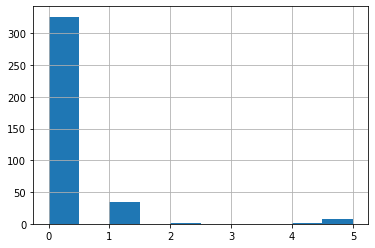

In [39]:
df_vabs_old_young = vine_young[vine_young['subjectkey'].isin(sub_id_vabs_old_young)]
df_vabs_old_young.head()
df_vabs_old_young[df_vabs_old_young==-999] = np.nan
df_vabs_old_young[df_vabs_old_young== 999] = np.nan

# check number of nans
df_vabs_old_young['check_na']=df_vabs_old_young.isnull().sum(axis=1)

print(df_vabs_old_young['check_na'].hist())

df_vabs_old_young_ = df_vabs_old_young[df_vabs_old_young['check_na']<3]

In [40]:
df_vabs_old_young_.head(30)

,subjectkey,interview_age,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,motorskillsdomain_totalb,composite_totalb,check_na
16,NDAREV722HRL,22,69.0,68.0,88.0,95.0,77.0,0
30,NDARXV302LNN,26,71.0,91.0,74.0,93.0,79.0,0
74,NDARNZ917EF3,26,97.0,104.0,91.0,93.0,95.0,0
83,NDAREK247RY2,26,74.0,85.0,74.0,100.0,80.0,0
95,NDARWK546KLR,22,80.0,75.0,76.0,78.0,74.0,0
102,NDARUN394HDU,22,77.0,107.0,84.0,113.0,94.0,0
864,NDARWK546KLR,22,80.0,75.0,76.0,78.0,74.0,0
876,NDARNZ917EF3,26,97.0,104.0,91.0,93.0,95.0,0
909,NDARXV302LNN,26,71.0,91.0,74.0,93.0,79.0,0
911,NDAREK247RY2,26,74.0,85.0,74.0,100.0,80.0,0


In [45]:
# print infos
print('total number of subject in the VABS_old:',df[['sub_ID']].drop_duplicates().shape[0])
print('number of young vabs subjects available:',subject_list_vabs_young.index.drop_duplicates().shape[0])
print('number of unique vabs young subjects available:',df_vabs_old_young_[['subjectkey']].drop_duplicates().shape[0])

total number of subject in the VABS_old: 2564
number of young vabs subjects available: 7054
number of unique vabs young subjects available: 170


In [46]:
df_mullen_vabs_old_.set_index('subjectkey', inplace=True)
df_vabs_old_young_.set_index('subjectkey', inplace=True)

In [47]:
DF_ALL = pd.concat([df_vabs_old_young_,df_mullen_vabs_old_], axis=0)
DF_ALL.head(100)

,interview_age,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,motorskillsdomain_totalb,composite_totalb,check_na,scoresumm_gm_t_score,scoresumm_vr_t_score,scoresumm_fm_t_score,scoresumm_rl_t_score,scoresumm_el_t_score,scoresumm_elc_std_score,scoresumm_gm_age_equiv,scoresumm_vr_age_equiv,scoresumm_fm_age_equiv,scoresumm_rl_age_equiv,scoresumm_el_age_equiv
subjectkey,,,,,,,,,,,,,,,,,,
NDAREV722HRL,22,69.0,68.0,88.0,95.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARXV302LNN,26,71.0,91.0,74.0,93.0,79.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARNZ917EF3,26,97.0,104.0,91.0,93.0,95.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAREK247RY2,26,74.0,85.0,74.0,100.0,80.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARWK546KLR,22,80.0,75.0,76.0,78.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARJW372VCW,45,76.0,66.0,63.0,64.0,64.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAR_INVKL656GOR,69,69.0,60.0,59.0,72.0,62.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARJE085MAR,60,87.0,73.0,63.0,78.0,72.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AxesSubplot(0.125,0.125;0.775x0.755)
(1076, 18)


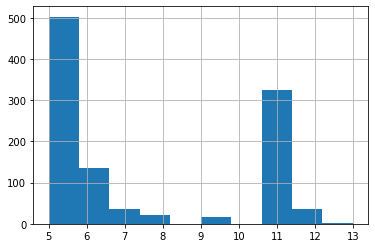

In [48]:
# check number of nans
DF_ALL['check_na']=DF_ALL.isnull().sum(axis=1)

print(DF_ALL['check_na'].hist())
print(DF_ALL.shape)

In [49]:
DF_ALL['check_na']

subjectkey
NDAREV722HRL    11
NDARXV302LNN    11
NDARNZ917EF3    11
NDAREK247RY2    11
NDARWK546KLR    11
                ..
NDARRT204AMB     6
NDARDT057AX5     7
NDARZN253ENV     7
NDARZH644JTA     8
NDARWL095PFF     8
Name: check_na, Length: 1076, dtype: int64

In [53]:
print('total number of subject in the VABS_old:',df[['sub_ID']].drop_duplicates().shape[0])
print('number of unique mullen/VABSold subjects available:',df_mullen_vabs_old_.index.drop_duplicates().shape[0])
print('number of unique VABSold/young subjects available:',df_vabs_old_young_.index.drop_duplicates().shape[0])


total number of subject in the VABS_old: 2564
number of unique mullen/VABSold subjects available: 206
number of unique VABSold/young subjects available: 170


In [57]:
# save sub_list
sublist_MSEL_VABS_old = pd.DataFrame(df_mullen_vabs_old_.index.drop_duplicates())
sublist_MSEL_VABS_old.to_csv(os.path.join(tidy_data_path,'sublist_VABS_old_MSEL.csv'))
sublist_VABS_young_old = pd.DataFrame(df_vabs_old_young_.index.drop_duplicates())
sublist_VABS_young_old.to_csv(os.path.join(tidy_data_path,'sublist_VABS_old_VABS_young.csv'))

In [56]:
sublist_MSEL_VABS_old

,subjectkey
0,NDARDE148UZK
1,NDARBD516EK3
2,NDARCB221KEA
3,NDARRF272YMG
4,NDARCX265ARU
...,...
201,NDARRK017HC5
202,NDARRT204AMB
203,NDARDT057AX5
204,NDARZN253ENV
